In [213]:
import sys
import platform
print(f'Was run on:\n{sys.version}\n{platform.platform()}')

Was run on:
3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Windows-10-10.0.22631-SP0


In [214]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import category_encoders

## PreProcessing

In [28]:
# Import Dataset
df = pd.read_csv("../Data/Data Produksi Beras Sumatera.csv")
columns = df.columns

# Check for missing value
df.isna().sum()     # No mising value

# Show 6 most front rows
df.head(6)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31
5,Aceh,1998,1404580.0,365892.0,1465.0,82.60,26.84


Data merupakan data geospasial Time Series yang mencakup informasi output produksi beras, luas panen, curah hujan, kelembapan, dan suhu rata-rata. Dataset sendiri tidak memiliki missing value sehingga tidak perlu adanya penanganan.

In [40]:
# Check type of each column
df.dtypes

# Get unique of each Province
provs = df["Provinsi"].unique()
provs

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung'], dtype=object)

Data ini hanya mencakup lokasi 'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', dan 'Lampung'

In [65]:
# Check for duplicated
df.duplicated().sum()       # None

# Check each `Tahun` of each `provinsi
for prov in provs:
    temp = df[df["Provinsi"]==prov]["Tahun"]
    print((f'{prov:18}: {temp.min()}-{temp.max()}'))

Aceh              : 1993-2020
Sumatera Utara    : 1993-2020
Sumatera Barat    : 1993-2020
Riau              : 1993-2020
Jambi             : 1993-2020
Sumatera Selatan  : 1993-2020
Bengkulu          : 1993-2020
Lampung           : 1993-2020


Seluruh Data provinsi bermulai dari 1993 hinga 2020.

In [78]:
# Transformation
# Scale [Luas Panen, Curah hujan, Kelembapan, Suhu rata-rata]
scaler = MinMaxScaler()
temp=df.iloc[:,2:]

df_scaled = df.copy()
df_scaled.iloc[:,2:]=temp

## Eksplorasi

In [127]:
columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

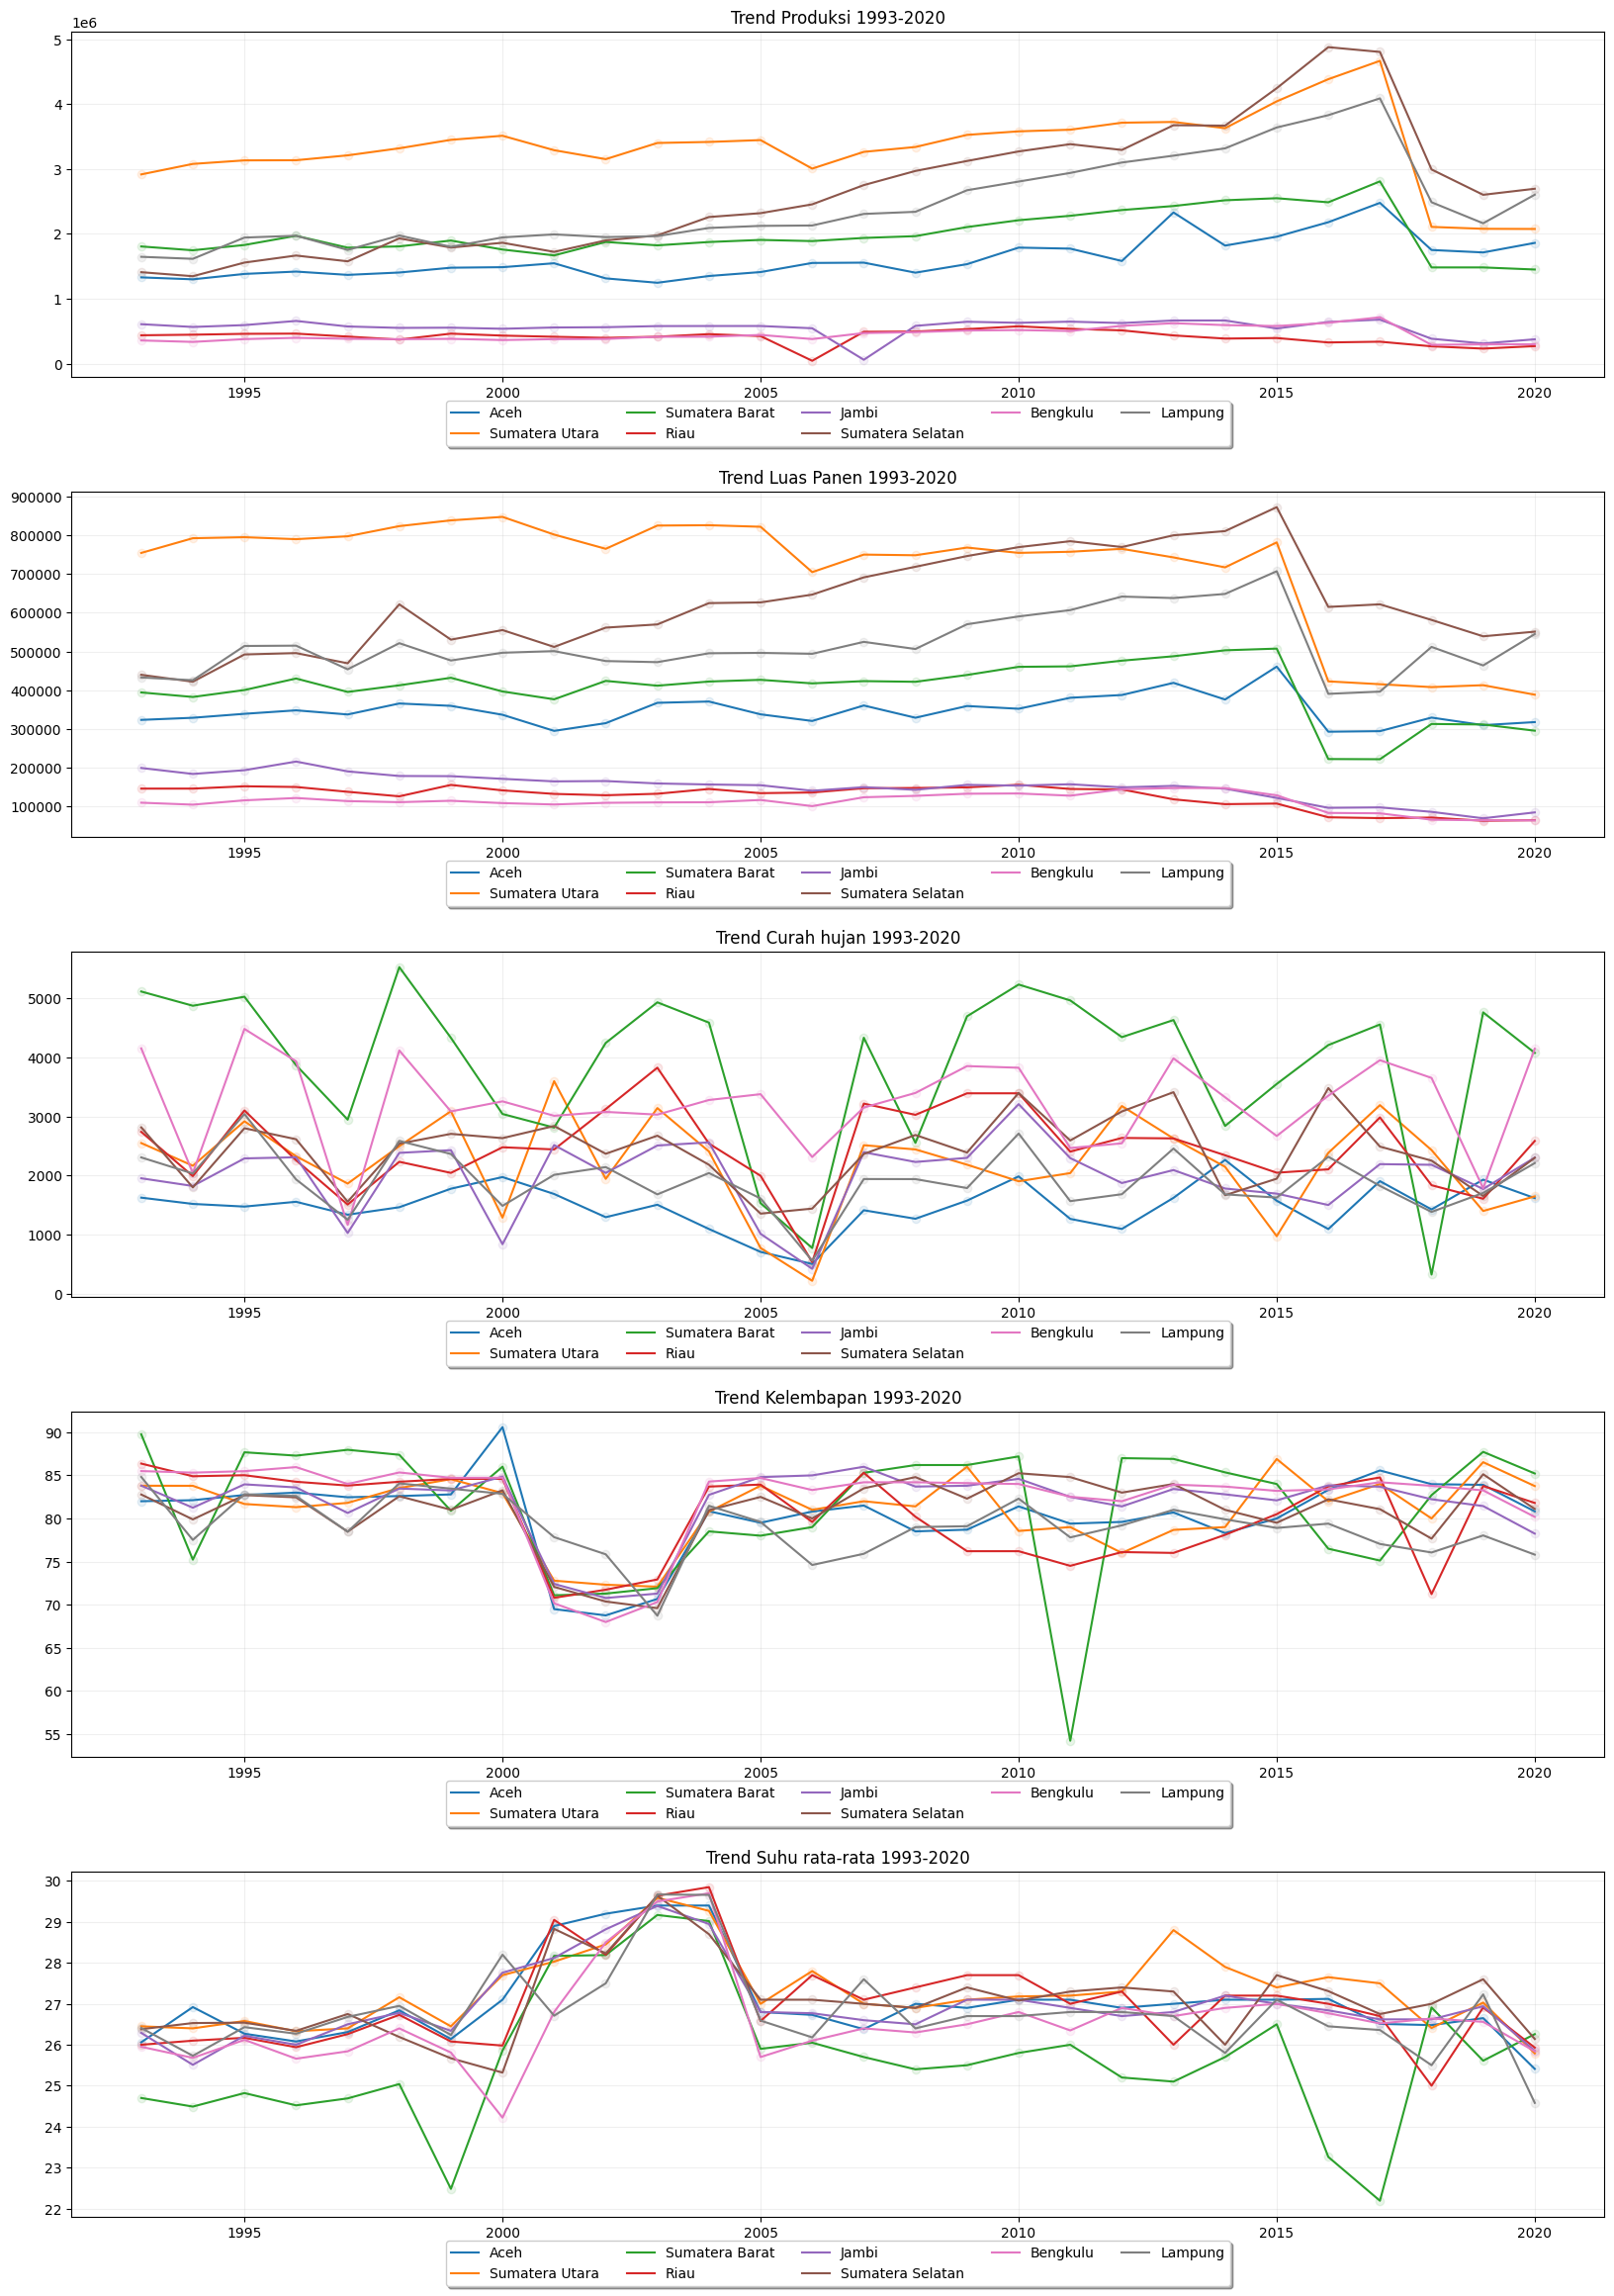

In [211]:
# Melihat Trend masing-masing provinsi pada setiap peubah
fig = plt.figure(figsize=(20,35))
fig.subplots_adjust(0.125, 0.125, 0.9, 0.9,1)
for iter, column in enumerate(columns[2:]):
    ax = fig.add_subplot(len(columns[2:])+1, 1, iter+1)
    ax.grid("on", alpha=0.2)
    ax.set_title(f'Trend {column} 1993-2020')
    for prov in provs:
        temp = df[df["Provinsi"] == prov]
        ax.plot(temp["Tahun"].values, temp[column].values, label=prov)
        ax.scatter(temp["Tahun"].values, temp[column].values, alpha=0.1)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.10,
                    box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
             fancybox=True, shadow=True, ncol=5)

<Axes: >

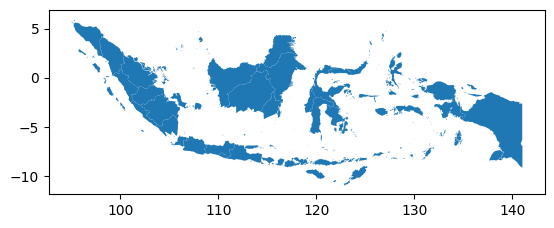

In [238]:
# Visualisasi Choropleth pulau Sumatera setiap peubah (GIF)

map_df = gpd.read_file("../Data/idn_admbnda_adm1_bps_20200401.shp")

map_df.plot()

Aceh True
Sumatera Utara True
Sumatera Barat True
Riau True
Jambi True
Sumatera Selatan True
Bengkulu True
Lampung True


<Axes: >

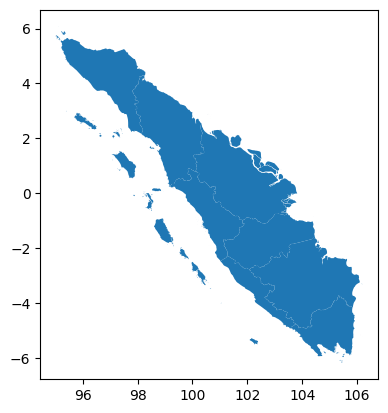

: 

In [262]:
# Check bila penulisan provnsi sesuai
for i in df["Provinsi"].unique():
    print(i, i in map_df["ADM1_EN"].unique())   #Aman
    
# Ambil provinsi yang berada pada df saja
temp = pd.DataFrame()
for i in df["Provinsi"]:
    temp = pd.concat((temp, map_df[map_df["ADM1_EN"]==i]))
temp = temp.drop_duplicates()
temp.plot()